Video Game Analysis


Data Prepocessing

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

def mean(val):
    numbers = val.split('-')                
    return (float(numbers[0].strip()) + float(numbers[1].strip())) * 0.5      

steam_games_beforemarch2025 = pd.read_csv("../Dataset/games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])

#Clean estimated owners collumns (From "1000 - 2000" to "1500" using mean function)
steam_games_beforemarch2025_cleaned["estimated_owners"] = steam_games_beforemarch2025_cleaned["estimated_owners"].apply(mean)

#clean genres collumns
steam_games_beforemarch2025_cleaned["genres"] = steam_games_beforemarch2025_cleaned["genres"].astype(str).str.strip("[]").str.replace("'", "", regex=False).str.replace('"', "", regex=False)
steam_games_beforemarch2025_cleaned["genres"] = steam_games_beforemarch2025_cleaned["genres"].str.split(",")
steam_games_beforemarch2025_exploded = steam_games_beforemarch2025_cleaned.explode("genres")


Graphs

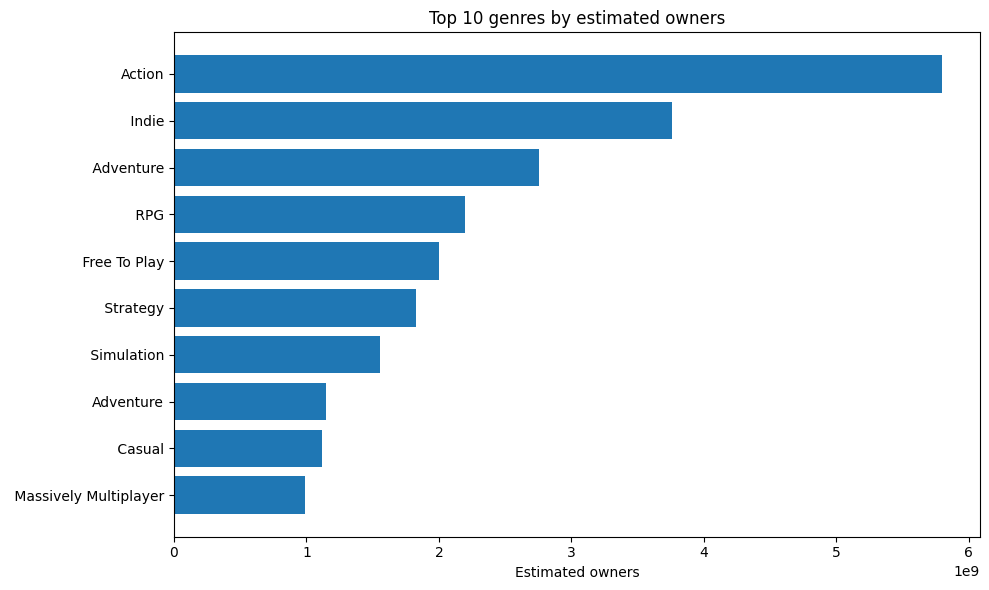

In [25]:
salesPerGenre = steam_games_beforemarch2025_exploded.groupby("genres")["estimated_owners"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(salesPerGenre.index[::-1], salesPerGenre.values[::-1])
plt.xlabel("Estimated owners")
plt.title("Top 10 genres by estimated owners")
plt.tight_layout()
plt.show()